In [ ]:
from pandas import read_csv, DataFrame
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
dataset = read_csv('Prestupniki.csv',';') #чтение файла
print(dataset) #печать общего множества

     X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  X11  D1
0     1  18   1   1   4   1   4   1   3    0    1   1
1     1  15   1   1   2   2   2   1   2    0    1   1
2     2  35   4   2   4   2   4   1   3    1    2   1
3     1  30   1   1   4   1   2   1   1    1    2   1
4     1  26   1   1   3   1   4   1   1    1    2   1
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ..
158   1  33   1   1   4   2   5   2   1    3    2   1
159   1  27   1   2   4   1   5   2   1    2    1   1
160   1  29   3   2   4   2   2   1   3    0    1   1
161   1  29   1   2   4   1   3   2   1    2    1   1
162   2  23   1   2   4   2   4   1   3    0    2   1

[163 rows x 12 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
dataset.dtypes #тип данных

X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
D1     int64
dtype: object

In [ ]:
#разделение входных и выходных данных
trg = dataset[['D1']] #выходной параметр
print (trg)


     D1
0     1
1     1
2     1
3     1
4     1
..   ..
158   1
159   1
160   1
161   1
162   1

[163 rows x 1 columns]


In [ ]:
trn = dataset.drop(['D1'], axis=1) #удаление последнего столбца из множества
print (trn)

     X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  X11
0     1  18   1   1   4   1   4   1   3    0    1
1     1  15   1   1   2   2   2   1   2    0    1
2     2  35   4   2   4   2   4   1   3    1    2
3     1  30   1   1   4   1   2   1   1    1    2
4     1  26   1   1   3   1   4   1   1    1    2
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...
158   1  33   1   1   4   2   5   2   1    3    2
159   1  27   1   2   4   1   5   2   1    2    1
160   1  29   3   2   4   2   2   1   3    0    1
161   1  29   1   2   4   1   3   2   1    2    1
162   2  23   1   2   4   2   4   1   3    0    2

[163 rows x 11 columns]


In [ ]:
#разделение на тестовые и обучающующие выборки
Xtrn, Xtest, Ytrn, Ytest = train_test_split(trn, trg, test_size=0.1) # перемешивание строк и разделение на обучающее и тестовое множества

print('Xtrn')
print(Xtrn.shape) #кол-во строк и столбцов
print(Xtrn)
print('Ytrn')
print(Ytrn)


Xtrn
(146, 11)
     X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  X11
108   1  20   1   2   4   1   3   2   3    0    2
29    1  30   1   2   2   1   2   1   1    2    1
62    1  36   1   3   2   2   2   1   1    2    2
64    1  57   2   2   4   2   5   1   3    0    1
41    1  27   1   1   3   2   4   1   3    0    1
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...
120   1  38   2   1   4   1   4   1   1    1    2
124   1  32   4   1   3   2   4   1   3    0    2
6     1  34   1   2   4   1   5   2   1    3    2
129   2  19   1   2   4   2   5   2   3    0    2
99    1  19   1   2   4   1   5   2   3    0    2

[146 rows x 11 columns]
Ytrn
     D1
108   0
29    1
62    1
64    0
41    1
..   ..
120   1
124   1
6     0
129   0
99    0

[146 rows x 1 columns]


In [ ]:
#  Стандартизация Xtrn, Xtest 
mean = Xtrn.mean(axis=0) #вычисление среднего арифметического в обучающем множестве по каждому столбцу
std = Xtrn.std(axis=0) #стандартное отклонение по каждому стобцу
Xtrn -= mean
Xtrn /= std
Xtest -= mean
Xtest /= std
#  Теперь каждый вх параметр имеет нулевое среднее и стандартное отклонение = 1

print('Xtrn')
print(Xtrn)
print()
print('Xtest')
print(Xtest)
print()
print('mean')
print(mean)
print()
print('std')
print(std)
Xtrn.shape

Xtrn
           X1        X2        X3       X4        X5        X6        X7  \
108 -0.517416 -0.673912 -0.596965  0.25680  0.578015 -0.797535 -0.479620   
29  -0.517416  0.103269 -0.596965  0.25680 -1.734045 -0.797535 -1.232573   
62  -0.517416  0.569578 -0.596965  2.13144 -1.734045  1.245275 -1.232573   
64  -0.517416  2.201658  0.492496  0.25680  0.578015  1.245275  1.026284   
41  -0.517416 -0.129885 -0.596965 -1.61784 -0.578015  1.245275  0.273332   
..        ...       ...       ...      ...       ...       ...       ...   
120 -0.517416  0.725014  0.492496 -1.61784  0.578015 -0.797535  0.273332   
124 -0.517416  0.258705  2.671418 -1.61784 -0.578015  1.245275  0.273332   
6   -0.517416  0.414142 -0.596965  0.25680  0.578015 -0.797535  1.026284   
129  1.919445 -0.751630 -0.596965  0.25680  0.578015  1.245275  1.026284   
99  -0.517416 -0.751630 -0.596965  0.25680  0.578015 -0.797535  1.026284   

           X8        X9       X10       X11  
108  0.996569  0.793197 -0.639724  0

(146, 11)

In [ ]:
# # # #     ПРОЕКТИРОВАНИЕ МОДЕЛИ    # # # # # # # # # # # # # # # # # # # # # # #
#подключаем керас
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
#import matplotlib.pyplot as plt

# Преобразуем формат множеств в формат nampy
x_train = Xtrn.to_numpy()
y_train = Ytrn.to_numpy()
print(x_train)

x_test = Xtest.to_numpy()
y_test = Ytest.to_numpy()

#   ПРОЕКТИРУЕМ МОДЕЛЬ
model =Sequential() # многослойный перцептрон

model.add(Dense(4, activation="tanh"))#первый скрытый слой с 4 нейронами
model.add(Dense(20, activation="tanh"))#второй скрытый слой с 20 нейронами
model.add(Dense(1))#один выходной параметр

from sklearn.metrics import max_error

model.compile(optimizer=Adam(learning_rate=0.006, beta_1=0.9, beta_2=0.999, amsgrad=False), loss="mse", metrics=["mae"])
#compile возвращает объект кода
# Адам - это алгоритм сочетающий всебе алгоритм с градиентным спуском 
# ( алгоритм оптимизации, который следует отрицательному градиенту целевой функции, чтобы найти минимум функции) 
# + по ходу выполнения подстраивает направление
# learning_rate - скорость обучения
# beta_1, beta_2 - коэффициент импульса
# учитывания знанчения прошлых градиентов
# mse - средне квадратичная ошибка
# mae - Средняя абсолютная ошибка






[[-0.51741558 -0.67391166 -0.59696494 ...  0.7931966  -0.63972401
   0.67590629]
 [-0.51741558  0.10326924 -0.59696494 ... -1.35137199  1.05845245
  -1.4693615 ]
 [-0.51741558  0.56957778 -0.59696494 ... -1.35137199  1.05845245
   0.67590629]
 ...
 [-0.51741558  0.4141416  -0.59696494 ... -1.35137199  1.90754068
   0.67590629]
 [ 1.91944489 -0.75162975 -0.59696494 ...  0.7931966  -0.63972401
   0.67590629]
 [-0.51741558 -0.75162975 -0.59696494 ...  0.7931966  -0.63972401
   0.67590629]]


In [ ]:
# # # #     ОБУЧЕНИЕ НЕЙРОСЕТИ    # # # # # # # # # # # # # # # # # # # # # # #
history = model.fit(x_train, y_train,  validation_split=0.1, verbose=1, epochs=100)


Epoch 1/100
5/5 [==============================] - 1s 34ms/step - loss: 0.7913 - mae: 0.7216 - val_loss: 0.2452 - val_mae: 0.4168
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 0.3114 - mae: 0.4606 - val_loss: 0.0968 - val_mae: 0.2206
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1979 - mae: 0.3447 - val_loss: 0.0792 - val_mae: 0.2263
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 0.1944 - mae: 0.3305 - val_loss: 0.0714 - val_mae: 0.2177
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 0.1741 - mae: 0.3099 - val_loss: 0.0627 - val_mae: 0.1850
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 0.1459 - mae: 0.2925 - val_loss: 0.0728 - val_mae: 0.1911
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1524 - mae: 0.3236 - val_loss: 0.0898 - val_mae: 0.2273
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1596 - mae: 0.3369 - va

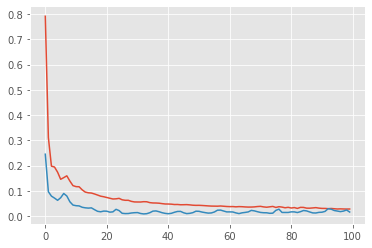

In [ ]:

#График
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid(True)
plt.show()




In [ ]:
# Проверка на тестовом множестве
predictions = model.predict(x_test)
print(y_test.shape)

print(y_test)
print()
print('predictions')
print(predictions)

(17, 1)
[[1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]]

predictions
[[ 1.0545685 ]
 [ 0.5585975 ]
 [ 0.97550184]
 [-0.10586864]
 [ 0.6953726 ]
 [-0.07590333]
 [ 0.935661  ]
 [ 0.71348757]
 [ 0.9187532 ]
 [ 1.0490116 ]
 [ 0.74036956]
 [ 0.79314995]
 [-0.05587661]
 [-0.06867276]
 [ 0.717852  ]
 [ 1.0689968 ]
 [ 0.8511502 ]]


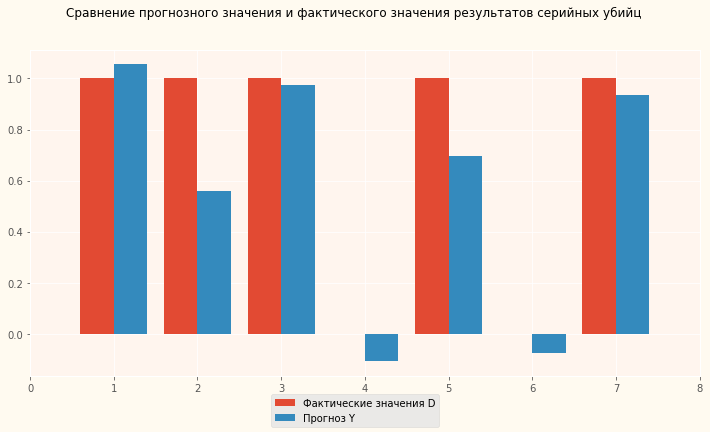

In [ ]:
def GlDiagram(n):
  # построение графика сравнения прогнозируемых значений и тестовых (фактических) значений температуры
  # Входные данные: y_test, predition 
  # n - количество выводимых значений
 
    %matplotlib inline
    import numpy as np
    import matplotlib.pyplot as plt
 
    #  Задаем смещение равное половине ширины прямоугольника:
    x1 = np.arange(1, n) - 0.2
    x2 = np.arange(1, n) + 0.2
    
    y1 = y_test.flatten()[:n-1]
    y2 = predictions.flatten()[:n-1] 

   
    fig, ax = plt.subplots()
 
    ax.bar(x1, y1, width = 0.4)
    ax.bar(x2, y2, width = 0.4)
 
    ax.set_facecolor('seashell')
    fig.set_figwidth(12)    #  ширина Figure
    fig.set_figheight(6)    #  высота Figure
    fig.set_facecolor('floralwhite')
    fig.suptitle("Сравнение прогнозного значения и фактического значения результатов серийных убийц")
    fig.legend(["Фактические значения D", "Прогноз Y"], loc = "lower center")
    plt.xlim([0,n])
    plt.show()
 
# Запуск процедуры:
GlDiagram(n=8)

In [ ]:
print(y_test.shape)

(17, 1)


********       ОЦЕНКА КАЧЕСТВА МОДЕЛИ   ************************************

In [ ]:
# Вычисление коэффициент детерминации
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print('r2=', r2)

r2= 0.7947018485310078


In [ ]:
# Вычисление абсолютной максимальной ошибки (max_error)
from sklearn.metrics import max_error
print(y_test.shape)
print(predictions.shape)
max_error = max_error(y_test, predictions)
print('max_error =', max_error)

(17, 1)
(17, 1)
max_error = 0.44140249490737915


In [ ]:
#  Вычисление средней абсолютной ощибки (mean_absolute_error (MAE))
from sklearn.metrics import mean_absolute_error
mean_absolute_error = mean_absolute_error(y_test, predictions)
print('mean_absolute_error =', mean_absolute_error)

mean_absolute_error = 0.1517060475752634


In [ ]:
#  Вычисление медианной абсолютной ощибки (median_absolute_error)
from sklearn.metrics import median_absolute_error
median_absolute_error = median_absolute_error(y_test, predictions)
print ("median_absolute_error=", median_absolute_error)

median_absolute_error= 0.08124679327011108


In [ ]:
# Вычисление среднекваратичной ошибки (MSE и RMSE)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print('MSE=', MSE)

from math import sqrt
RMSE = sqrt(mean_squared_error(y_test, predictions))
print('RMSE=', RMSE)

MSE= 0.036939459779887863
RMSE= 0.1921964093834426


++++++++++     СОХРАНЕНИЕ СЕТИ       ++++++++++++++

In [ ]:
# Сохранение сети
model.save('NeuroSet', save_format='h5') 

In [ ]:
Xtrn.to_csv('Trn.csv')

In [ ]:
#  Загрузка нейросети из файла
from tensorflow.keras.models import load_model
model = load_model('NeuroSet')

# Применение сети
predictions = model.predict(x_test)
print('y_test')
print(y_test)
print('predictions')
print(predictions)


y_test
[[1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]]
predictions
[[ 1.0545685 ]
 [ 0.5585975 ]
 [ 0.97550184]
 [-0.10586864]
 [ 0.6953726 ]
 [-0.07590333]
 [ 0.935661  ]
 [ 0.71348757]
 [ 0.9187532 ]
 [ 1.0490116 ]
 [ 0.74036956]
 [ 0.79314995]
 [-0.05587661]
 [-0.06867276]
 [ 0.717852  ]
 [ 1.0689968 ]
 [ 0.8511502 ]]


In [ ]:
#  Прогнозирование влияния возраста на рейтинг мэра (Подготовка)
# Формирование входных параметров модели

x_input = read_csv('Age.csv',';')
x_input




/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,1,27,4,1,4,1,2,1,1,1,2
1,1,28,4,1,4,1,2,1,1,1,2
2,1,29,4,1,4,1,2,1,1,1,2
3,1,30,4,1,4,1,2,1,1,1,2
4,1,31,4,1,4,1,2,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
60,1,87,4,1,4,1,2,1,1,1,2
61,1,88,4,1,4,1,2,1,1,1,2
62,1,89,4,1,4,1,2,1,1,1,2
63,1,90,4,1,4,1,2,1,1,1,2


In [ ]:
# Формирование оси абсцисс (Возраст)
Age = x_input[['X2']]
print (Age)

    X2
0   27
1   28
2   29
3   30
4   31
..  ..
60  87
61  88
62  89
63  90
64  91

[65 rows x 1 columns]


In [ ]:
# Стандартизация входных параметров
x_input -= mean
x_input /= std
x_input

# Преобразование в Нампай
x_inp = x_input.to_numpy()
predictions = model.predict(x_inp)
predictions

array([[ 0.99096733],
       [ 0.9947763 ],
       [ 0.9979664 ],
       [ 1.0004867 ],
       [ 1.0022832 ],
       [ 1.0032966 ],
       [ 1.0034623 ],
       [ 1.0027089 ],
       [ 1.0009562 ],
       [ 0.99811506],
       [ 0.99408543],
       [ 0.98875564],
       [ 0.9820023 ],
       [ 0.9736889 ],
       [ 0.9636693 ],
       [ 0.9517871 ],
       [ 0.9378812 ],
       [ 0.9217901 ],
       [ 0.903359  ],
       [ 0.8824499 ],
       [ 0.8589512 ],
       [ 0.83279145],
       [ 0.8039514 ],
       [ 0.77247643],
       [ 0.73848635],
       [ 0.7021818 ],
       [ 0.66384435],
       [ 0.6238317 ],
       [ 0.5825653 ],
       [ 0.54051226],
       [ 0.4981644 ],
       [ 0.45601302],
       [ 0.41452745],
       [ 0.3741334 ],
       [ 0.33519882],
       [ 0.29802307],
       [ 0.2628337 ],
       [ 0.22978602],
       [ 0.19897002],
       [ 0.17041628],
       [ 0.14410628],
       [ 0.11998193],
       [ 0.09795465],
       [ 0.07791422],
       [ 0.05973667],
       [ 0

In [ ]:
x = Age  
y = predictions


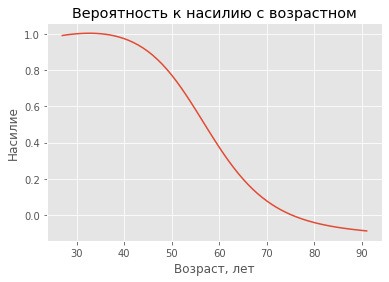

In [ ]:

from matplotlib import pyplot as plt   
   
x = Age  
y = predictions

plt.plot(x,y)   
plt.title("Вероятность к насилию с возрастном")   
plt.ylabel('Насилие')   
plt.xlabel('Возраст, лет')   
plt.show() 

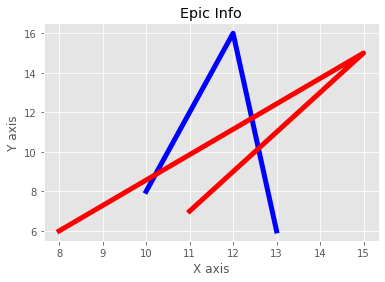

In [ ]:
from matplotlib import pyplot as plt   
from matplotlib import style   
   
style.use('ggplot')   
x = [10, 12, 13]   
y = [8, 16, 6]   
x2 = [8, 15, 11]   
y2 = [6, 15, 7]   
plt.plot(x, y, 'b', label='line one', linewidth=5)   
plt.plot(x2, y2, 'r', label='line two', linewidth=5)   
plt.title('Epic Info')   
plt.ylabel('Y axis')   
plt.xlabel('X axis')   
 
plt.show() 